<a href="https://www.kaggle.com/code/ayushgpt8/income-data-analysis?scriptVersionId=155941469" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Understanding Income Data - Analysing and visualizing data.

In this notebook, we will take a look at income data. This data can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Table of contents:
* Loading Excel files
* Writing Excel files
* Finding missing data
* Summarizing Text data
* Creating a correlation matrix
* Creating scatter plots

## Loading excel files

In [1]:
import pandas as pd
from urllib.request import urlopen

In [2]:
names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'
fin = urlopen(names_url)
data = fin.read()

In [3]:
print(data.decode('utf-8'))

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

Here is an interesting fact. The url above does not actually contain the data. It contains the information about the data. This may seem useless but it contains a lot of important information about the data, specifically about the columns and the type of values in those columns which is given at the end above.

The actual data can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

But if you open this url in the browser, you will see that it does not contain the column names. We will have to append those ourselves. So let's do that.

We will take the entire information about the columns from the first url and extract the columns names from it.

In [4]:
names = '''age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.'''

names = [col.split(':')[0] for col in names.strip().split('\n')]
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

Let's now use this while reading the data

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

df = pd.read_csv(url, names=names, index_col=False)
df

/tmp/ipykernel_19/610852926.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(url, names=names, index_col=False)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


Lets save this data into a file. We'll save this into an excel format just to spice things up! ;)

In [6]:
import os

os.makedirs("data", exist_ok=True)

In [7]:
df.to_excel('data/adult_income.xlsx')

> **Note:**
> This dataset can also be found here: https://archive.ics.uci.edu/dataset/2/adult
>
> This page gives pretty much the same description about the dataset. And when you download the dataset, you get the same files as above compressed in a zip format.
>
> There are minor differences though, the data containing in this page has more values and has some missing data as well in the some columns.
>
> For now, I will continue using the dataset that we read above from the other url. If you would like me to take a look at this one instead and build a classification model as well, you can let me know by leaving a comment on the notebook.

## Read Excel

While we already have the data in a dataframe. Let's reread the data from the saved excel.

In [8]:
!pip install openpyxl

In [9]:
df = pd.read_excel('data/adult_income.xlsx', dtype_backend='pyarrow')
df

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


We already have an index but pandas didnt see that. Let's make sure the first column is set as index

In [10]:
df = pd.read_excel('data/adult_income.xlsx', dtype_backend='pyarrow', index_col=0)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


## Finding missing data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   age             32561 non-null  int64[pyarrow] 
 1   workclass       32561 non-null  string[pyarrow]
 2   fnlwgt          32561 non-null  int64[pyarrow] 
 3   education       32561 non-null  string[pyarrow]
 4   education-num   32561 non-null  int64[pyarrow] 
 5   marital-status  32561 non-null  string[pyarrow]
 6   occupation      32561 non-null  string[pyarrow]
 7   relationship    32561 non-null  string[pyarrow]
 8   race            32561 non-null  string[pyarrow]
 9   sex             32561 non-null  string[pyarrow]
 10  capital-gain    32561 non-null  int64[pyarrow] 
 11  capital-loss    32561 non-null  int64[pyarrow] 
 12  hours-per-week  32561 non-null  int64[pyarrow] 
 13  native-country  32561 non-null  string[pyarrow]
dtypes: int64[pyarrow](6), string[pyarrow](8)
me

While `.info()`  already shows that we dont have any missing data. But it is better to use `isna()` to see if there is any missing data

In [12]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [13]:
# or this
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
dtype: bool

## Object columns

In [14]:
df.select_dtypes(include="string") # use object for pandas 1.x

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [15]:
df.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64[pyarrow]

If you are not fond of looking a series, we can also plot the same as a `barh()` plot to convey the same info in a visual way.

<Axes: ylabel='education'>

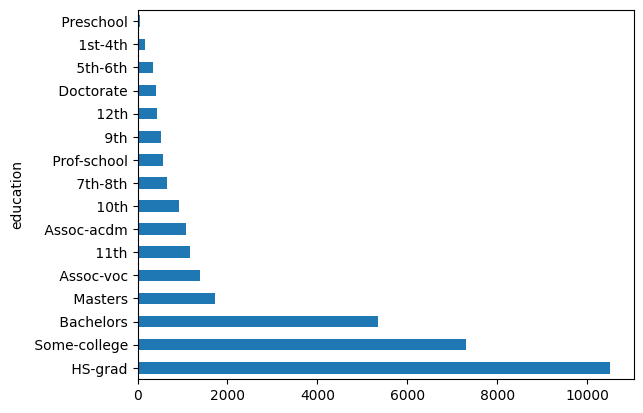

In [16]:
df.education.value_counts().plot.barh()

Apart from the education column telling us the level of education obtained by each person, we also have another column in numerical format that tells us the same thing. We can use `filter()` here to find out columns that have education in them.

In [17]:
(df
    .filter(regex=r'education')
)

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


Now mind you, here we are using an extremely simple example here to find out something about columns. We can build some really complex queries to find out exactly what we need. This obviously depends on the problem at hand.

Taking a look at other columns with `strings` datatype shows us that many of these can be turned into categorical columns. We wont even need to manually check each one as the information about the dataset is already given to us above. We can just refer that.